In [2]:
#import matplotlib 
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
#import numpy
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [12]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [13]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [ ]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [ ]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [ ]:
# Create our session (link) from Python to the DB
from sqlalchemy.orm import Session
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [ ]:
# Find the most recent date in the data set.
inspector = inspect(engine)
inspector.get_table_names()

# columns_measurement = inspector.get_columns('Measurement')
# for column in columns_measurement:
#     print(column['name'], column['type'])

recent_date = session.query(Measurement).order_by(Measurement.date.desc()).first()

print(recent_date.date)

2017-08-23


2010-01-01
2011-01-01


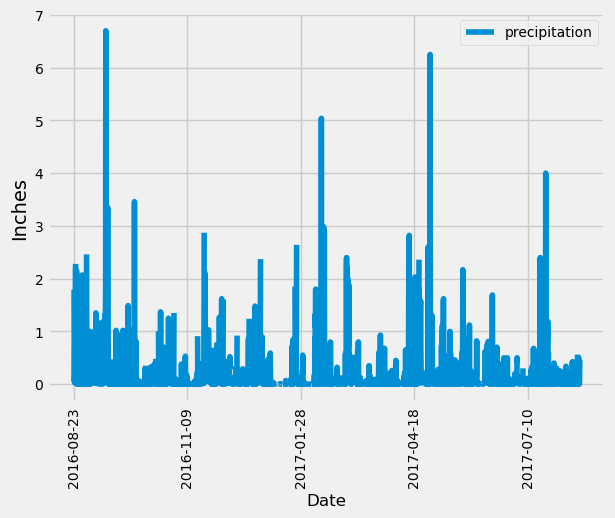

In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
import datetime as dt

# Calculate the date one year from the last date in data set.
last_date = session.query(Measurement).order_by(Measurement.date).first()
print(last_date.date)

last_date_plus_year = dt.date(2010,1,1) + dt.timedelta(days=365)
print(last_date_plus_year)


# Perform a query to retrieve the data and precipitation scores
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days = 365)
last_year_perc = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
last_year_perc_df = pd.DataFrame(last_year_perc, columns=['date', 'precipitation'])
last_year_perc_df.head()
# Sort the dataframe by date
sorted_percp = last_year_perc_df.sort_values('date')
sorted_percp.head()

# Use Pandas Plotting with Matplotlib to plot the data

sorted_percp.plot(x = 'date', y = 'precipitation', rot = 90, fontsize=10)

plt.xlabel('Date', fontsize=12)
plt.ylabel('Inches')
plt.legend(loc='upper right', fontsize=10)

In [ ]:
# Use Pandas to calculate the summary statistics for the precipitation data
precp_data = session.query(Measurement.date, Measurement.prcp).all()

precp_data_df = pd.DataFrame(precp_data)

# precp_data_df.head()

print(precp_data_df.describe())

               prcp
count  18103.000000
mean       0.160644
std        0.468746
min        0.000000
25%        0.000000
50%        0.010000
75%        0.110000
max       11.530000


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number of stations in the dataset

stations_total = session.query(Station).count() 
stations_total

NameError: name 'session' is not defined

In [ ]:
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [ ]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

active_station = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature
USC00519281_stats = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
USC00519281_stats

[(54.0, 85.0, 71.66378066378067)]

Text(0, 0.5, 'Frequency')

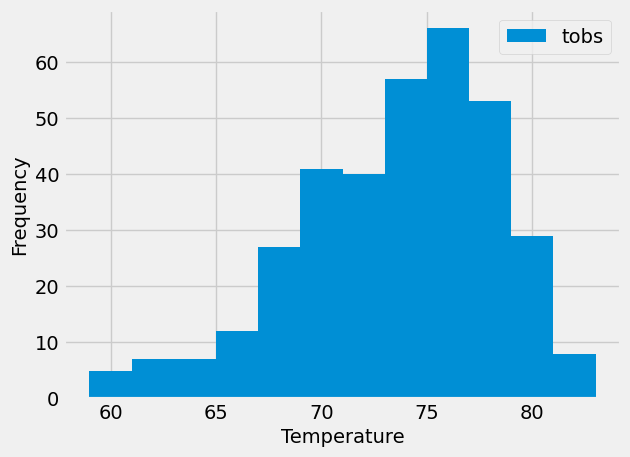

In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

prev_year = dt.date(2017, 8, 23) - dt.timedelta(days = 365)
USC00519281_year = session.query(Measurement.tobs).filter(Measurement.date >= prev_year).filter(Measurement.station == 'USC00519281').all()

USC00519281_year_df = pd.DataFrame(USC00519281_year)

USC00519281_year_df.plot.hist(bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')



In [ ]:
#close session

session.close()
engine.dispose()